# Business Metrics

In most institutions, management keeps track of the overall health of the business through the result of measurements called metrics. Two common metrics (Net Promoter Score & Churn Rate ) will be create in the following.

## Net Promoter Score NPS 

NPS is a customer success metric that quantifies customer satisfaction. 

- Detractors: Unhappy customers who share their negative experience with the product or company; they may actively spread negative feedback.

- Passives: Customers who may be pleased with the product, but aren't actively promoting it and will quickly turn to the competition if a better opportunity presents itself.

- Promoters: Extremely satisfied customers who will act as brand ambassadors.

Formula of NPS is calculated as the percentage of promoters minus the percentage of detractors.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [33]:
nps = pd.read_csv("/Users/chanemma/Desktop/Dataquest/nps.csv", parse_dates=["event_date"])
nps.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [34]:
def categorize(score):
    if score in range(7):
        return "Detractor"
    elif score in [7,8]:
        return "Passive"
    elif score in [9,10]:
        return "Promoter"
    else:
        return "score should be >= 0 or < 11 without decimal"

In [35]:
nps.info()
year = nps["event_date"].dt.year
month = nps["event_date"].dt.month
nps["yearmonth"] = 100*year + month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 78.1 KB


In [36]:
nps['category'] = nps['score'].apply(categorize)
nps = nps.pivot_table(index='yearmonth',columns='category',aggfunc='size')
nps["total_responses"]=nps.sum(axis=1)
nps["nps"]=(nps['Promoter']-nps['Detractor'])/nps['total_responses']
nps["nps"]=(nps['nps']*100).astype(int)

Text(0.5, 0, '')

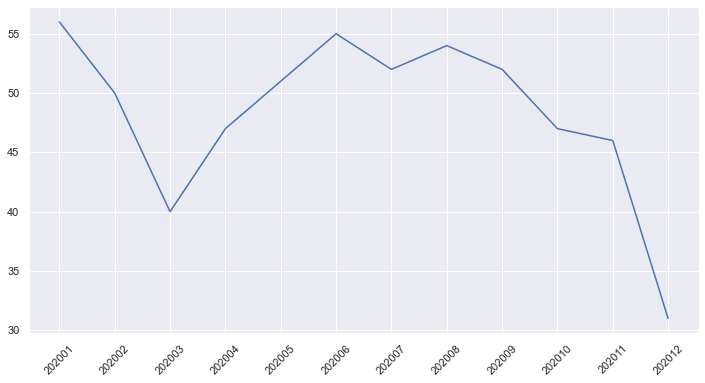

In [37]:
ax = nps.reset_index().plot(kind="line", x="yearmonth",y="nps",
                            figsize=(12,6), legend=False
                           )
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text("")

It is obvious that the customer satisfaction kept dropping since 2020 Aug and reached the lowest in Dec. In order to improve the NPS and retent customers, the company can begin by surveying its customers to get feedback and gain some understanding as to what's driving this apparent insatisfaction.

## Churn Rate

Churn Rate is one of the most important metrics for companies. Customers are the cashflow of a company. When a customer stops being a customer, cash stops flowing in. Churn rate is the percentage of customers that churned in a given time period.

Formula: Churned customers/Total customers

In this case, I plan to purchase a local gym from its previous owners. I would like to see why the business was unprofitable as there is a large potential in the market.

In [38]:
gym = pd.read_csv("/Users/chanemma/Desktop/Dataquest/muscle_labs.csv", parse_dates=['start_date','end_date'])
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB


In [39]:
year = gym['end_date'].dt.year
month = gym['end_date'].dt.month
gym['churn_month'] = 100*year + month

In [40]:
monthly_churn = pd.DataFrame()
monthly_churn['total_churned'] = gym.groupby(["churn_month"]).size()
monthly_churn.head()

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


<AxesSubplot:xlabel='churn_month'>

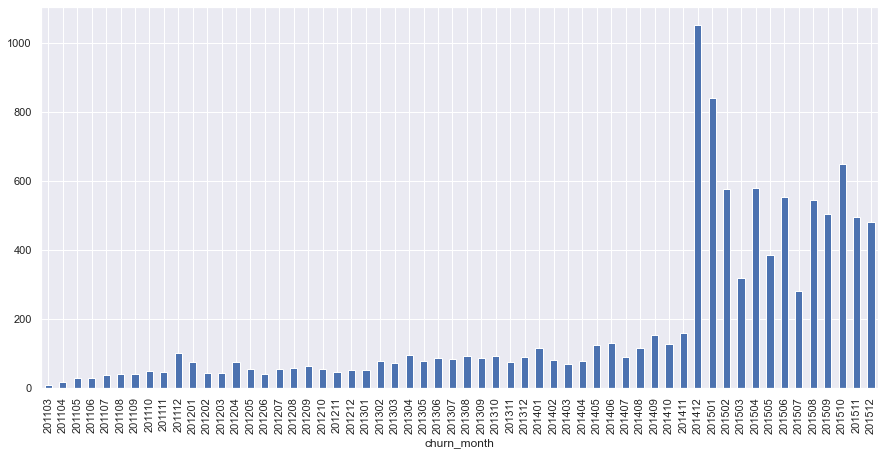

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
monthly_churn['total_churned'].plot.bar()

The above bar chart shows that most customers churned in 2014 Dec. However, the way monthly_churn is created, it can only contain months in which customers have churned — it could potentially be missing a few months.

In [42]:
years = list(range(2011,2016))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
print(yearmonths[:-10])

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502]


In [43]:
churn = pd.DataFrame({"yearmonth": yearmonths})
churn = pd.merge(churn, monthly_churn, left_on='yearmonth', right_index=True, how='left')
churn.head()
churn = churn.fillna(0)
churn['total_churned']=churn['total_churned'].astype(int)

After merging the monthly_churn with full months table, churn period will be defined and calculate the churn rate.

In [44]:
def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    
    return ((gym["start_date"] < date) & (date <= gym["end_date"])).sum()

In [45]:
churn['total_customers'] = churn['yearmonth'].apply(get_customers)
churn['churn_rate'] = churn['total_churned']/churn['total_customers']
churn['yearmonth'] = churn['yearmonth'].astype(str)
churn.head()

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0,0,NaN
1,201102,0,17,0.000000
2,201103,8,47,0.170213
3,201104,16,82,0.195122
4,201105,29,105,0.276190


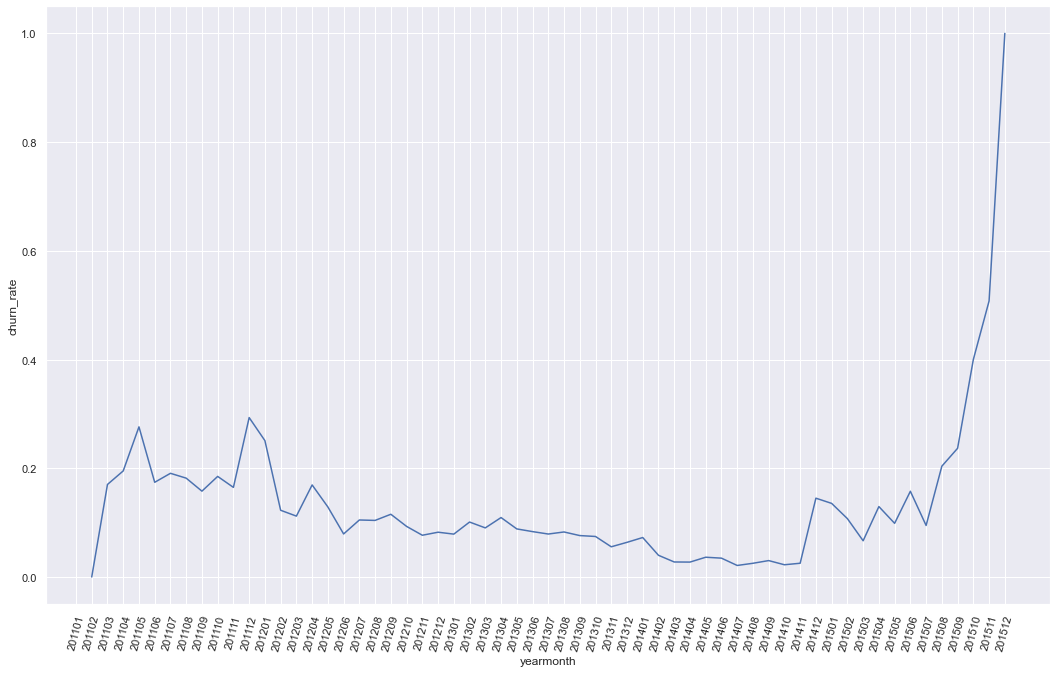

In [46]:
sns.set(rc={'figure.figsize':(18,11)})
ax = sns.lineplot(x="yearmonth", y="churn_rate", data=churn)
ax.tick_params(axis='x', rotation=75)

Above line chart shows that the churn rate started to rise in July 2015 and reached 100% within 5 months. Surveys should be sent out to the churned customers, gather their feedbacks and improve the whole business model.